## Problem Set 2

## **Question 1**

### **Part (a)**

The true exchange rate $y_i^*$ follows the regression model:

$$
y_i^* = x_i' \beta + \epsilon_i, \quad \epsilon_i \sim N(0, \sigma^2)
$$

However, the Central Bank **intervenes** if the exchange rate exceeds an upper threshold $u$ or falls below a lower threshold $b$, meaning we **only observe the censored exchange rate** $y_i$ as:

$$
y_i =
\begin{cases} 
b, & \text{if } y_i^* \leq b \quad (\text{Left Censoring}) \\
y_i^*, & \text{if } b < y_i^* < u \quad (\text{Uncensored}) \\
u, & \text{if } y_i^* \geq u \quad (\text{Right Censoring})
\end{cases}
$$


### Problem Associated with running a regression of $y_i$ on $x_i$ - 

If we **ignore censoring** and run a standard **OLS regression** on $y_i$, we have two problems:

1. **Underestimation of Slope $\beta$**  
   - Since extreme values are replaced by fixed cutoffs $(b, u)$, the **true variability of $y_i^*$ is reduced**, leading to **attenuation bias** (estimated coefficients shrink toward zero).

2. **Non-Normal Residuals**  
   - The censoring **distorts the normal distribution** of residuals, violating OLS assumptions.

Thus, **OLS is not a valid estimation method** in this case.


### **Part (b)**

### Log-Likelihood Function Components - 
The likelihood function describes the probability of observing the given data, given the parameters $\beta$ and $\sigma$.

Since the exchange rate is censored, we need to consider three cases**:

1. Left Censoring: When $y_i^* \leq b$, we observe $y_i = b$.
2. Uncensored Values: When $b < y_i^* < u$, we observe $y_i = y_i^*$.
3. Right Censoring: When $y_i^* \geq u$, we observe $y_i = u$.

### Probability Components for Each Case - 
The likelihood function consists of three parts:

1. Probability of Lower Censoring (i.e., $y_i^* \leq b$):  
   $$
   P(y_i^* \leq b) = \Phi \left( \frac{b - x_i' \beta}{\sigma} \right)
   $$
   where $\Phi(\cdot)$ is the Cumulative Distribution Function (CDF) of the standard normal distribution.

2. Probability of Observing an Uncensored Value $b < y_i^* < u$:  
   $$
   f(y_i | x_i, \beta, \sigma) = \frac{1}{\sigma} \phi \left( \frac{y_i - x_i' \beta}{\sigma} \right)
   $$
   where $\Phi(\cdot)$ is the Probability Density Function (PDF) of the standard normal distribution.

3. Probability of Upper Censoring (i.e., $y_i^* \geq u$):  
   $$
   P(y_i^* \geq u) = 1 - \Phi \left( \frac{u - x_i' \beta}{\sigma} \right)
   $$


### Writing the Log-Likelihood Function - 
The total log-likelihood function is the sum of the logarithm of these probabilities across all observations:

$$
L(\beta, \sigma) =
\sum_{y_i = b} \log \Phi \left( \frac{b - x_i' \beta}{\sigma} \right) +
\sum_{b < y_i < u} \log \left[ \frac{1}{\sigma} \phi \left( \frac{y_i - x_i' \beta}{\sigma} \right) \right] +
\sum_{y_i = u} \log \left[ 1 - \Phi \left( \frac{u - x_i' \beta}{\sigma} \right) \right]
$$

### **Part (c)**

The asymptotic variance of the Maximum Likelihood Estimator (MLE) $\hat{\beta}$ measures how the estimator behaves as the sample size $n \to \infty$.  

In MLE, the variance-covariance matrix of the estimated parameters is given by the inverse of the Fisher Information Matrix.


### Fisher Information Matrix - 

$$
I(\beta, \sigma) = -E \left[ \frac{\partial^2 L(\beta, \sigma)}{\partial \beta \partial \beta'} \right]
$$

where $L(\beta, \sigma)$ is the log-likelihood function derived in Part b.

### The asymptotic variance of $\hat{\beta}$ is then - 

$$
\text{Var}(\hat{\beta}) = I(\beta, \sigma)^{-1} = \left( -E \left[ \frac{\partial^2 L(\beta, \sigma)}{\partial \beta \partial \beta'} \right] \right)^{-1}
$$

This expression gives the standard errors of the estimated coefficients.


- The Fisher Information Matrix measures how much information the data provides about $\beta$.  
- A larger sample size increases the information, reducing the variance of $\hat{\beta}$.  
- The inverse of the information matrix gives the standard errors of the MLE estimates.  


### Computing the Variance - 
1. Compute the Hessian Matrix (the matrix of second derivatives of the log-likelihood function).
2. Take the negative expectation of the Hessian to get the Fisher Information Matrix.
3. Invert the Fisher Information Matrix to obtain the variance-covariance matrix of $\hat{\beta}$ .


## **Question 2**

### **Part (a)**

### Understanding the Middle Censoring Model

The true latent variable $y_i^*$ follows the regression model:

$$
y_i^* = x_i' \beta + \epsilon_i, \quad \epsilon_i \sim N(0, \sigma^2)
$$

However, the observed dependent variable $y_i$ is transformed as follows:

$$
y_i =
\begin{cases} 
y_i^* - a, & \text{if } y_i^* < a \quad (\text{Left Uncensored}) \\  
0, & \text{if } a \leq y_i^* \leq b \quad (\text{Middle Censored}) \\  
y_i^* - b, & \text{if } y_i^* > b \quad (\text{Right Uncensored})  
\end{cases}
$$

Defining the Observed $y_i$ 

- If $y_i^*$ is less than $a$, we observe $y_i = y_i^* - a$ (shifted left).
- If $y_i^*$ is between $a$ and $b$, it is censored and observed as zero.
- If y_i^* is greater than $b$, we observe $y_i = y_i^* - b$ (shifted right).

This transformation leads to a censored data problem, where standard OLS regression is biased because it does not account for the censoring effect.

### **Part (b)**

### Deriving the Log-Likelihood Function 

The log-likelihood function accounts for three cases:  

1. Left Uncensored Values ($y_i^* < a$)
   - We observe $y_i = y_i^* - a$.
   - The likelihood contribution is:

   $$
   f(y_i | y_i^* < a) = \frac{1}{\sigma} \phi \left( \frac{y_i + a - x_i' \beta}{\sigma} \right)
   $$

2. Middle Censored Values ($a \leq y_i^* \leq b$)
   - We only observe $y_i = 0$, meaning $y_i^*$ is within the censoring range.
   - The probability of this happening is:

   $$
   P(a \leq y_i^* \leq b) = \Phi \left( \frac{b - x_i' \beta}{\sigma} \right) - \Phi \left( \frac{a - x_i' \beta}{\sigma} \right)
   $$

3. Right Uncensored Values ($y_i^* > b$) 
   - We observe $y_i = y_i^* - b$.
   - The likelihood contribution is:

   $$
   f(y_i | y_i^* > b) = \frac{1}{\sigma} \phi \left( \frac{y_i + b - x_i' \beta}{\sigma} \right)
   $$

### Log-Likelihood Function
Summing over all observations:

$$
L(\beta, \sigma) =
\sum_{y_i < 0} \log f(y_i | y_i^* < a) +
\sum_{y_i = 0} \log P(a \leq y_i^* \leq b) +
\sum_{y_i > 0} \log f(y_i | y_i^* > b)
$$

## Problem 3


Problem 3(a) - OLS Coefficient for 'tobacco': -190.99397628836954
Bias Expected: Yes, due to truncation. OLS underestimates the true effect.

Current log-likelihood: -1761216.0537064532
Current log-likelihood: -1760735.3834067245
Current log-likelihood: -1760554.5261860716
Current log-likelihood: -1760552.9272448837
Current log-likelihood: -1760552.824306814
Current log-likelihood: -1760552.3856307906
Current log-likelihood: -1760551.4987466491
Current log-likelihood: -1760549.0380451563
Current log-likelihood: -1760543.2124387524
Current log-likelihood: -1760530.3132703379
Current log-likelihood: -1760508.3760745726
Current log-likelihood: -1760492.6910883544
Current log-likelihood: -1760476.749725847
Current log-likelihood: -1760472.3560204448
Current log-likelihood: -1760471.617560381
Current log-likelihood: -1760471.0945228117
Current log-likelihood: -1760469.5537630036
Current log-likelihood: -1760462.886742313
Current log-likelihood: -1760454.1980739585
Current log-likelihood: -

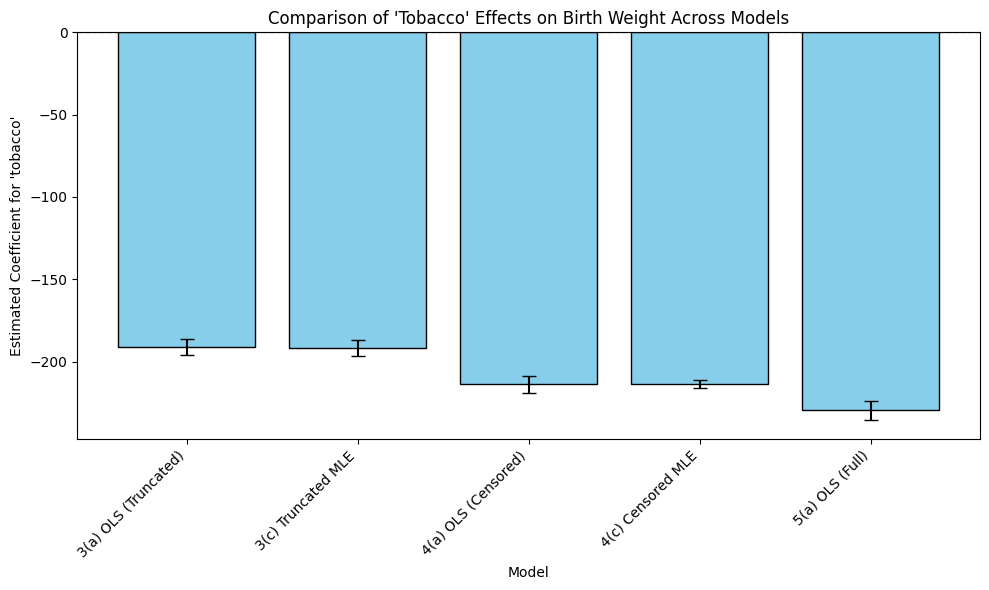

In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import minimize
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# ---------------------------
# PROBLEM 3: TRUNCATED MODEL
# ---------------------------

# Load truncated data
data_trun = pd.read_csv('/Users/jadenfix/Desktop/Graduate School Materials/micrometrics/paeco526_trun.csv')
y_trun = data_trun['dbirwt']

# Define covariates based on assignment data notes
covariates = [
    'tobacco',    # Smoking indicator: 1 if mother smoked during pregnancy
    'dmage', 'dmage2', 'dmeduc', 'dmar', 'mblack', 'mhispan', 'motherr', 'foreignb',  # Mother's attributes
    'dfage', 'dfeduc', 'fblack', 'fhispan', 'fotherr',                                    # Father's attributes
    'alcohol', 'drink',                                                                    # Other risky behavior
    'tripre0', 'tripre2', 'tripre3', 'nprevist', 'adequac2', 'adequac3',                     # Medical care
    'first', 'dlivord', 'disllb', 'pre4000', 'plural',                                      # Pregnancy history and maternal health
    'diabete', 'anemia', 'cardiac', 'chyper'
]
X_trun = data_trun[covariates]
X_trun = sm.add_constant(X_trun)

# 3(a) OLS on truncated data
ols_model_trun = sm.OLS(y_trun, X_trun).fit()
print("\nProblem 3(a) - OLS Coefficient for 'tobacco':", ols_model_trun.params['tobacco'])
print("Bias Expected: Yes, due to truncation. OLS underestimates the true effect.\n")

# 3(b) Log-Likelihood Function for Truncated Regression
def truncated_loglik(params, y, X, lower=2500):
    beta = params[:-1]
    log_sigma = params[-1]
    sigma = np.exp(log_sigma)  # enforce sigma > 0
    Xb = X @ beta
    z = (lower - Xb) / sigma
    ll = norm.logpdf(y, loc=Xb, scale=sigma) - norm.logsf(z)
    return -ll.sum()

# 3(c) Maximum Likelihood Estimation (MLE) for Truncated Model
def print_callback(xk):
    current_ll = -truncated_loglik(xk, y_trun, X_trun)
    print("Current log-likelihood:", current_ll)

# Use OLS estimates as starting values; adjust sigma initialization to use sqrt(scale)
init_params = np.append(ols_model_trun.params, np.log(np.sqrt(ols_model_trun.scale)))

result_trun = minimize(
    truncated_loglik, 
    init_params, 
    args=(y_trun, X_trun), 
    method='L-BFGS-B',
    bounds=[(None, None)]*(len(init_params)-1) + [(-20, 20)],
    callback=print_callback
)

if result_trun.success:
    beta_ml_trun = result_trun.x[:-1]
    sigma_ml_trun = np.exp(result_trun.x[-1])
    final_loglik_trun = -result_trun.fun

    # Extract Hessian-based standard errors
    try:
        hess_inv_dense = result_trun.hess_inv.todense()
        se_params_trun = np.sqrt(np.diag(hess_inv_dense))
    except Exception as e:
        print("Could not extract standard errors from Hessian inverse for truncated MLE:", e)
        se_params_trun = np.full(len(result_trun.x), np.nan)

    tobacco_index_trun = X_trun.columns.get_loc('tobacco')
    beta_tobacco_trun = beta_ml_trun[tobacco_index_trun]
    se_tobacco_trun = se_params_trun[tobacco_index_trun]

    ci_lower_trun = beta_tobacco_trun - 1.96 * se_tobacco_trun
    ci_upper_trun = beta_tobacco_trun + 1.96 * se_tobacco_trun

    print("\nProblem 3(c) - MLE Coefficient for 'tobacco':", beta_tobacco_trun)
    print(f"Estimated sigma: {sigma_ml_trun:.2f}")
    print("Final Log-Likelihood:", final_loglik_trun)
    print(f"Standard Error for 'tobacco': {se_tobacco_trun}")
    print(f"95% Confidence Interval for 'tobacco': [{ci_lower_trun}, {ci_upper_trun}]")
else:
    print("Optimization failed. Message:", result_trun.message)

# ---------------------------
# PROBLEM 4: CENSORED (TOBIT) MODEL
# ---------------------------

# Load censored data
data_cen = pd.read_csv('/Users/jadenfix/Desktop/Graduate School Materials/micrometrics/paeco526_cen_full.csv')
y_cen = data_cen['cdbirwt2500']

X_cen = data_cen[covariates]
X_cen = sm.add_constant(X_cen)

# 4(a) OLS on censored data
ols_model_cen = sm.OLS(y_cen, X_cen).fit()
print("\nProblem 4(a) - OLS Coefficient for 'tobacco':", ols_model_cen.params['tobacco'])
print("Bias Expected: Yes, because censoring introduces measurement error (low values are recorded as 2500).\n")

# 4(b) Log-Likelihood Function for Censored Regression (Tobit)
def censored_loglik(params, y, X, censoring_point=2500):
    beta = params[:-1]
    log_sigma = params[-1]
    sigma = np.exp(log_sigma)
    Xb = X @ beta
    uncensored = (y > censoring_point)
    censored = ~uncensored
    ll = np.empty(len(y))
    ll[uncensored] = norm.logpdf(y[uncensored], loc=Xb[uncensored], scale=sigma)
    ll[censored] = norm.logcdf(censoring_point, loc=Xb[censored], scale=sigma)
    return -np.sum(ll)

def print_callback_cen(xk):
    current_ll = -censored_loglik(xk, y_cen, X_cen)
    print("Current censored log-likelihood:", current_ll)

# Use OLS estimates as starting values; adjust sigma initialization to use sqrt(scale)
init_params_cen = np.append(ols_model_cen.params, np.log(np.sqrt(ols_model_cen.scale)))

result_cen = minimize(
    censored_loglik,
    init_params_cen,
    args=(y_cen, X_cen),
    method='L-BFGS-B',
    bounds=[(None, None)]*(len(init_params_cen)-1) + [(-20, 20)],
    callback=print_callback_cen
)

if result_cen.success:
    beta_ml_cen = result_cen.x[:-1]
    sigma_ml_cen = np.exp(result_cen.x[-1])
    final_loglik_cen = -result_cen.fun

    # Extract Hessian-based standard errors
    try:
        hess_inv_dense = result_cen.hess_inv.todense()
        se_params_cen = np.sqrt(np.diag(hess_inv_dense))
    except Exception as e:
        print("Could not extract standard errors from Hessian inverse for censored MLE:", e)
        se_params_cen = np.full(len(result_cen.x), np.nan)

    tobacco_index_cen = X_cen.columns.get_loc('tobacco')
    beta_tobacco_cen = beta_ml_cen[tobacco_index_cen]
    se_tobacco_cen = se_params_cen[tobacco_index_cen]

    ci_lower_cen = beta_tobacco_cen - 1.96 * se_tobacco_cen
    ci_upper_cen = beta_tobacco_cen + 1.96 * se_tobacco_cen

    print("\nProblem 4(c) - MLE Coefficient for 'tobacco':", beta_tobacco_cen)
    print(f"Estimated sigma: {sigma_ml_cen:.2f}")
    print("Final Log-Likelihood:", final_loglik_cen)
    print(f"Standard Error for 'tobacco': {se_tobacco_cen}")
    print(f"95% Confidence Interval for 'tobacco': [{ci_lower_cen}, {ci_upper_cen}]")
else:
    print("Optimization failed. Message:", result_cen.message)

# ---------------------------
# PROBLEM 5: FULL DATASET (BENCHMARK MODEL)
# ---------------------------

# Load full dataset
data_full = pd.read_csv('/Users/jadenfix/Desktop/Graduate School Materials/micrometrics/paeco526_cen_full.csv')
y_full = data_full['dbirwt']

X_full = data_full[covariates]
X_full = sm.add_constant(X_full)

ols_model_full = sm.OLS(y_full, X_full).fit()
beta_full = ols_model_full.params['tobacco']
se_full = ols_model_full.bse['tobacco']
ci_lower_full = beta_full - 1.96 * se_full
ci_upper_full = beta_full + 1.96 * se_full

print("\nProblem 5(a) - OLS Coefficient for 'tobacco':", beta_full)
print(f"Standard Error: {se_full}")
print(f"95% Confidence Interval: [{ci_lower_full}, {ci_upper_full}]")

# ---------------------------
# Extract Results from Previous Problems for Comparison
# ---------------------------
beta_ols_trun = ols_model_trun.params['tobacco']
se_ols_trun = ols_model_trun.bse['tobacco']
ci_lower_ols_trun = beta_ols_trun - 1.96 * se_ols_trun
ci_upper_ols_trun = beta_ols_trun + 1.96 * se_ols_trun

beta_ml_trun_tobacco = beta_ml_trun[X_trun.columns.get_loc('tobacco')]
se_ml_trun_tobacco = se_params_trun[X_trun.columns.get_loc('tobacco')]
ci_lower_ml_trun = beta_ml_trun_tobacco - 1.96 * se_ml_trun_tobacco
ci_upper_ml_trun = beta_ml_trun_tobacco + 1.96 * se_ml_trun_tobacco

beta_ols_cen_tobacco = ols_model_cen.params['tobacco']
se_ols_cen_tobacco = ols_model_cen.bse['tobacco']
ci_lower_ols_cen = beta_ols_cen_tobacco - 1.96 * se_ols_cen_tobacco
ci_upper_ols_cen = beta_ols_cen_tobacco + 1.96 * se_ols_cen_tobacco

beta_ml_cen_tobacco = beta_ml_cen[X_cen.columns.get_loc('tobacco')]
se_ml_cen_tobacco = se_params_cen[X_cen.columns.get_loc('tobacco')]
ci_lower_ml_cen = beta_ml_cen_tobacco - 1.96 * se_ml_cen_tobacco
ci_upper_ml_cen = beta_ml_cen_tobacco + 1.96 * se_ml_cen_tobacco

results_table = pd.DataFrame({
    "Model": [
        "3(a) OLS (Truncated Sample)", 
        "3(c) Truncated MLE", 
        "4(a) OLS (Censored Sample)", 
        "4(c) Censored MLE", 
        "5(a) OLS (Full Data)"
    ],
    "Coefficient (Tobacco)": [
        beta_ols_trun, 
        beta_ml_trun_tobacco, 
        beta_ols_cen_tobacco, 
        beta_ml_cen_tobacco, 
        beta_full
    ],
    "Standard Error": [
        se_ols_trun, 
        se_ml_trun_tobacco, 
        se_ols_cen_tobacco, 
        se_ml_cen_tobacco, 
        se_full
    ],
    "CI Lower": [
        ci_lower_ols_trun, 
        ci_lower_ml_trun, 
        ci_lower_ols_cen, 
        ci_lower_ml_cen, 
        ci_lower_full
    ],
    "CI Upper": [
        ci_upper_ols_trun, 
        ci_upper_ml_trun, 
        ci_upper_ols_cen, 
        ci_upper_ml_cen, 
        ci_upper_full
    ]
})

print("\nComparison of Models:\n", results_table.to_string(index=False))
results_table.to_csv("model_comparison_results.csv", index=False)
print("\nComparison table saved as 'model_comparison_results.csv'")

print("\nDiscussion on Biases:")
print("- The OLS estimate in 3(a) (Truncated Sample) is biased because it excludes all birth weights ≤2500g, leading to underestimation of the true effect of smoking.")
print("- The MLE estimate in 3(c) corrects for truncation and should be closer to the true effect.")
print("- The OLS estimate in 4(a) (Censored Sample) is biased because all birth weights ≤2500g are recorded as exactly 2500, introducing measurement error.")
print("- The MLE estimate in 4(c) corrects for censoring and should be closer to the true effect.")
print("- The OLS estimate in 5(a) (Full Data) is the benchmark, as it is based on the complete dataset.")

# ---------------------------
# Graphical Comparison of Estimates
# ---------------------------
models = [
    "3(a) OLS (Truncated)",
    "3(c) Truncated MLE",
    "4(a) OLS (Censored)",
    "4(c) Censored MLE",
    "5(a) OLS (Full)"
]

coefficients = [
    beta_ols_trun,
    beta_ml_trun_tobacco,
    beta_ols_cen_tobacco,
    beta_ml_cen_tobacco,
    beta_full
]

errors = [
    1.96 * se_ols_trun,      
    1.96 * se_ml_trun_tobacco,
    1.96 * se_ols_cen_tobacco,
    1.96 * se_ml_cen_tobacco,
    1.96 * se_full
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(models, coefficients, yerr=errors, capsize=5, color='skyblue', edgecolor='black')
ax.axhline(0, color='gray', linewidth=1, linestyle='--')
ax.set_xlabel("Model")
ax.set_ylabel("Estimated Coefficient for 'tobacco'")
ax.set_title("Comparison of 'Tobacco' Effects on Birth Weight Across Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Chay and Powell (2001) highlight how standard OLS regression struggles when dealing with censored or truncated data, which directly relates to the issues in Problems 3(a) and 4(a) of this assignment. In those cases, OLS underestimates the true effect of smoking on birth weight because it either ignores missing low-birth-weight babies (truncation) or treats censored values as if they were real observations. To correct this, Problems 3(c) and 4(c) use MLE, which explicitly models the probability of missing or censored values, leading to better estimates. However, as Chay and Powell caution, MLE methods like Tobit still assume normality and homoskedasticity—assumptions that, if wrong, can introduce their own biases. That’s where the benchmark in Problem 5(a) comes in—it helps us see how well our models perform compared to the full dataset. If the MLE estimates differ significantly from the full-data OLS, it suggests that alternative approaches, like CLAD or SCLS, could be more reliable. This matters beyond just technical modeling—getting the impact of smoking on birth weight right is crucial for public health policies. Underestimating smoking’s harm due to poor modeling could lead to ineffective interventions, which is exactly why using the right statistical tools is so important.